In [2]:
from IPython.display import HTML

HTML('''
<style>
/* Change monospace font in markdown (for inline code and code blocks) */
div.text_cell_render code,
div.text_cell_render pre {
    font-family: monospace;  /* Your preferred monospace font */
    font-size: 14px;
}
</style>
''')


# Week 1 (Python Review)

Julia + Python + R

All 3 can be used for Jupyter Notebook

Scikit-Learn and Tensorflow available pre loaded on Colab

## Markdown rules

using a '#' will result in a section heading
using a "##' will give you a Heading 2

using a '-' will result in a list item
- list item 1
- list item 2

using a '*' will also result in an non-numbered list item
* text uses markdown format

## Python Recap 2

Greatest Common Divisor in 2 ways:
1. storing all the common factors
2. simply remembering the last valid factor

In [ ]:
def gcd(m,n):
  cf = []
  for i in range(1, min(m,n)+1):
    if (m%i == 0) and (n%i == 0):
      cf.append(i)
  return cf[-1]

In [ ]:
gcd(8,16)

8

In [ ]:
def gcd(m,n):
  for i in range(1, min(m,n)+1):
    if (m%i == 0) and (n%i == 0):
      mrcf = i
  return mrcf

In [ ]:
gcd(8,16)

8

In [ ]:
gcd(25,18)

1

Efficiency of both are same, they take time of m and n, i.e. like comparing each number with the ranger of numbers.

## Python Recap - 2
Checking the primality of a number

2 ways:

1. Checking the primes in a given maximum number:
  
  Use a for loop to do that

2. Checking what the first n primes are

  Use a while loop for that

In [ ]:
#factors of a given number
def factors(n):
  fl =[]
  for i in range(1,n+1):
    if n%i == 0:
      fl.append(i)
  return fl

In [ ]:
factors(4)

[1, 2, 4]

In [ ]:
#Check Primality of a given number
#Google Suggested Version
def isprime(n):
  if len(factors(n)) == 2:
    return True
  else:
    return False

In [ ]:
isprime(4)

False

In [ ]:
#check primality of numbers from 1 to n given n
def primeupto(n):
  pl = []
  for i in range(1,n+1):
    if isprime(i):
      pl.append(i)
  return pl

In [ ]:
primeupto(10)

[2, 3, 5, 7]

In [ ]:
#First n prime numbers
#Google Suggested Again
def nprimes(n):
  pl = []
  i = 2
  while len(pl) < n:
    if isprime(i):
      pl.append(i)
    i += 1
  return pl

In [ ]:
nprimes(4)

[2, 3, 5, 7]

## Exception Handling

Code can generate many types of errors
* division by 0
* file not found
* disk full while writing
* list out of bounds

Syntax error not handled as an exception

In [ ]:
#code goes like this
try:
  #enter code here that can go wrong
  x,y = 2,3
  z = x+y
except IndexError:
  #only for IndexError
  z = 1
except (NameError, KeyError):
  #For multiple exception types same code
  z = 1
except:
  #For any and all other errors
  z = 1
else:
  #Execute this if code does execute
  z = 1
finally:
  #Always execute this
  z = 1

collection scores in dictionaries

In [ ]:
#Create Dictionary
scores = {"Shefali": [3,22],
          "Harmanpreet": [200,3]}

In [ ]:
#traditional approach
if 'b' in scores.keys():
    scores['b'].append(5)
else:
    scores['b'] = [5]

In [ ]:
#using exceptions
try:
    scores['b'].append(5)
except KeyError:
    scores['b'] = [5]

In [ ]:
scores

{'Shefali': [3, 22], 'Harmanpreet': [200, 3], 'b': [5, 5]}

## Python Recap - 3

both versions of GCD take time proportional to min(m,n)
is there a way to do it better?

suppose d divides m and n
* m = ad, n = bd
* m - n = (a-b)d
* d also divides (m - n)

So improving upon it would be to make recursive function
* Base case: n divides m and the answer is n
* otherwise reduce gcd(m,n) to gcd(n, m-n)

In [ ]:
def gcd(m,n):
    (a,b) = (max(m,n), min(m,n))
    if a%b == 0:
        return(b)
    else:
        return(gcd(b, a-b))

In [ ]:
gcd(12,16)

4

This still somehow apparently takes time proportional to max(M,n)
for example take gcd(2, 9999)
it has to -2 5000 times before arriving at 1

how to do better?
* Suppose n does not divide M
* then M = qn + r
    * q -> quotient, r -> remainder
* ad = qbd + r
    * r must be form of cd

### Euclid's Algorithm
* If n divides m, gcd(m,n) = n
* Otherwise, compute gcd(n, m mod n)

In [ ]:
def gcd(m,n):
    (a,b) = (max(m,n), min(m,n))
    if a%b == 0:
        return(b)
    else:
        return(b, a%b)

This times time proportional to number of digits in max(m,n)

One of the first non trivial algorithm

## Classes and Objects
* Abstract Datatype
    * Stores some information
    * Designated function to manipulate the information
    * For instance, stack: last-in, first-out, push(), pop()
* Separate private implementation fro public specification
* Class:
    * Template for a Data type
    * how data is stored
    * how public functions manipulate data

In [ ]:
# 2-D Points in Cartesian Co-ordinates
import math
class Point:
    def __init__(self, a=0,b=0):
        self.x = a
        self.y = b
    def translate(self, delx, dely):
        self.x += delx
        self.y += dely
    def odistance(self):
        d =  math.sqrt(self.x*self.x + self.y*self.y)
        return d
    def __add__(self, p):
        return(Point(self.x + p.x, self.y + p.y))
    def __str__(self):
        return('('+str(self.x)+','+str(self.y)+')')

### important codes
* __ init__() - constuctor

* __ str__() - convert object to string
    *  invoked by print()

* __ add__() invoked by +

* __mult __ invoked by *

* __lt __ invoked by <

* __ge __ invoked by >=

In [ ]:
p = Point(3,4)
q = Point(7,10)

In [ ]:
p.odistance()

5.0

In [ ]:
q.odistance()

12.206555615733702

In [ ]:
print(p+q)

(10,14)


In [ ]:
# 2-D Points in Polar Co-ordinates
class Point:
    def __init__(self, a=0,b=0):
        self.r = math.sqrt(a*a + b*b)
        if a == 0:
            self.theta = math.pi/2
        else:
            self.theta = math.atan(b/a)
    def odistance(self):
        return self.r
    def __add__(self, p):
        return(Point(self.r + p.r, self.theta + p.theta))
    def __str__(self):
        return('('+str(self.r)+','+str(self.theta)+')')
#some more nonsense of translating point

In [ ]:
p = Point(3,4)
q = Point(7,10)

In [ ]:
print(p+q)

(17.309757508164093,0.1092519876585497)


## Timing Code

Python has a library time with various unseful functions

perf_time() is a performance counter
it just gives up absolute timing

to make sense of it, you should start timer before code, and end, and then remove the difference

In [ ]:
import time

start = time.perf_counter()

#execute code

end = time.perf_counter()

elapsed = end - start
elapsed

3.599992487579584e-05

In [ ]:
class Timer:
    def __init__(self):
        self._start_time = 0
        self._elapsed_time = 0

    def start(self):
        self._start_time = time.perf_counter()

    def stop(self):
        self._elapsed_time = time.perf_counter() - self._start_time

    def elapsed(self):
        return(self._elapsed_time)

* create a time class
* Two internal values
    * _start_time
    * _elapsed_time
* start starts the times
* stop records the elapsed time
* Python executes 10e7 operations per second
    * considerably slower than C/C++ which is around 10e8 or 9

# Week 2


## Analysis of Algorithms

### How performance is measured
* Two main resources of interest
  * Running time
  * space - memory
* time <- processing pwower
  * Enhancing hardware has only a limited impact at a practical level
* Storage limited by available memory
* **Typically we focus on time rather than space**

### Input size
* running time depends on input size (larger takes longer time)
* input size - n; time - t(n)

Example 1: aadhar - 10^9
* naive algorithm - t(n) - n^2
* log(n) = k => n = 2^k

### Orders of magnitude
When comparing t(n) , focus on order of magnitude

Eg: f(n) = n^3 ; g(n) = 5000n^2
* for small values of n, f(n) < g(n)
* After n = 5000, f(n) overtakes g(n)


### Analysis
* should be independent of underlying hardware
  * not use actual time
  * measure in terms of basic operations
* Typical basic operations
  * Compare two values
  * Assign a value to a variable

EG: Exchange a pair of values
(x, y) = (y,x)
focusing on order of magnitude, both are within a factor of 3

### What is input size
Typically a natural parameter
* Size of a list/array that we want to search or sort
* number of objects we want to rearrange
* Number of vertices and number edge in a graph

for numeric problems
* Magnitude of n isn't correct
* Arithmetic operations are performed digit but digit
* Number of digits is a natural measure of input size

### Which inputs should we consider
Ideally, want the average behaviour
  * Difficult to compute
  * Average over what? All inputs equally likely
  * Need a probability distribution over inputs

Instead, worst case?
* Input that forces the algorithm to take longest possible time

Eg: Search for value not present in an unsorted list, must scan all elements

**Upper bound for worst case guarentees good performance**


## Comparing Order of Magnitude

### Upper Bounds
f(x) is said to ve O[g(x)] if we can find constraints c and x0 such that c.g(x) is an upper bound for f(x) for x beyond x0

*We are given f(x) and g(x) what we have to find is if g is an upper bound function of f*

*  **f(x) <= cg(x) for every x >= x0**

.

**Example:**

100n + 5 is O(n^2)

.

f(x) = 100n + 5

g(x) = n^2

.

for f(x) 100n + 5 <= 100n + n (for n greater than 5) = 101n

n<sub>0</sub> = 5 ;  c = 101

*Alternatively*

100n + 5 <= 100n + 5n = 105n (for n >=1)

105n <= 105n^2

n<sub>0</sub> = 1 ;  c = 105

**No unique solution, but highest term matters the most**

### Useful Property
if f1(n) if O[g1(n)] and f2(n) is O[g2(n)], then f1(n) + f1(n) is O[max(g1(n), g2(n))]

### Lower Bounds
denoted by omega
typically establish lower bounds for problem rather than individual algorithm
* for bubble sort, (i.e. comparison and swapping), we require Omega(n.logn) comparisons

### Tight bounds
When big O and Omega are similar, theta is used

## Calculating Complexity

### Finding maximum element in a list
* Input size is length of list
* single loop scans all ements
* always takes n steps
* Overall time is O(n)

### Checking whether list contains duplicates
* input size is length of list
* nested loops scans all pairs of elements'
* Best Case - A duplicate may be found in the very first iteration
* Worst case - no duplicates, both loops run fully
* time is n(n-1)/2
* Overall time in O(n^2)

### Matrix multiplication
* [m x n] x [n x p]
* Overall time is O(mnp) or O(n^3)

### Number of bits in binary representation of n
* log n for n to reach 1
* For number theoretic problem, input size is number of digits
* Algorithms is linear in input size

### Towers of Hanoi
* Recursive function
M(n) -> number of moves to transfer n disks
M(n) = 2^n - 1


### Overall
iterative programs: focus on loops
Recursive programs: Write and solve a recurrence



## Searching in a List

### Search Problem
* is value v present in list l
* Naive solutions scans the list
* Input size n, the length of the list
* Worst case, v not present in l, complexity O(n) = n

### Sorted list, binary search
O(n) = log<sub>2</sub>n

### Binary search, recursive function
T(n) -> time to search a list of length n
* If n = 0, we exit, T(n) = 1
* If n > 0, T(n) = T(n//2) + 1

Solve by unwinding i.e. putting in the same function again and again to see the pattern
T(n) = 2 + log(n)

In [ ]:
# naive search O(n)
def naivesearch(v, l):
  for x in l:
    if x == v:
      return True
  return False

In [ ]:
# binary search O(logn)
def binarysearch(v,l):
  if l == []:
    return False

  m = len(l)//2
  if v == l[m]:
    return True
  elif v < l[m]:
    return binarysearch(v, l[:m])
  else:
    return binarysearch(v, l[m+1:])

## Selection Sort


* Go through the list and find the minimum, place it at the minimum position for the unsorted list

### Efficiency
* Outer loop interates n times
* Inner loop: n - i steps to find minimum in L[i:]
* T(n) = n + (n - 1) + ... + 1 = n(n+1)/2
T(n) = O(n^2)

In [ ]:
def SelectionSort(L):
  n = len(L)
  if n < 1:
    return(L)
  for i in range(n):
    # Assume L[:i] is sorted
    mpos = i
    # mpos: position of minimum in L[i:]
    for j in range(i+1, n):
      if L[j] < L[mpos]:
        mpos = j
    (L[i], L[mpos]) = (L[mpos], L[i])
  return(L)

## Insertion Sort


### Strategy
Take a ppaer, put it into the list by comparing it with all elements

### Approaches
1. Iterative Formula
* Assume L[:i] is sorted
* Instert L[i]  in L[:i]

Outer loop iterates n times
inner loop i steps to insert L[i] in L[:i]

T(n) = 0+1+...+(n-1)

O(n) = n^2


2. Recusrive
* Inductively sort L[:i]
* Insert L[i] in L[:i]

same as both

### Summary:
* Creates new sorted list
* Worst case complexity is O(n^2)
  * not all cases
  * If list sorted, Insert stops in 1 step
  * Overall time can be close to O(n)

In [ ]:
# Iterative Approach
def InsertionSort(L):
  n = len(L)
  if n < 1:
    return(L)
  for i in range(n):
    # Assume L[:i] is sorted
    # Move L[i] to correct position in L
    j = i
    while j > 0 and L[j] < L[j-1]:
      (L[j], L[j-1]) = (L[j-1], L[j])
      j = j - 1
  return(L)

In [ ]:
# Recursive Approach
def Insert(L,v):
  n = len(L)
  if n == 0:
    return v
  if v >= L[-1]:
    return(L + [v])
  else:
    return(Insert(L[:-1], v)+L[-1:])

def ISort(L):
  n = len(L)
  if n < 1:
    return(L)
  L = Insert(ISort(L[:-1]), L[-1])
  return(L)

## Merge Sort

### Strategy
* Divide the list into two halves
* Separately sort the left and right half
* Combine the two sorted halves to get a fully sorted list

#### Merging
Two sorted lists A and B into a single sorted list C
* Compare first elements of A and B
* Move te smaller of the two to C
Repear till you exhaust A and B

In [ ]:
# Merge Function
def merge(A, B):
  (m,n) = (len(A), len(B))
  (C,i,j,k) = ([],0,0,0)
  while k < m+n:
    if i == m:
      C.extend(B[j])
      k = k + (n-j)
    elif j == n:
      C.extend(A[i])
      k = k + (m-i)
    elif A[i] < B[j]:
      C.extend(A[i])
      (i, k) = (i+1,k+1)
    else:
      C.append(B[j])
      (j,k) = (j+1,k+1)
    return C

### Analysis of Each Merge
* Merge A of length m, B of length n
* Output list C has length m+n
* In each iterction we add (at least) one element to C
* Hence merge takes time O(m+n)
* Recall that m+n <= 2(max(m,n))
* if m~n, merge take time, O(n)

### Analyzing MergeSort
Pre: Assume, n = 2^k

Recurrence
* T(0) = T(1) = 1
* T(n) = 2T(n/2) + n
  * Solve two subproblems of size n/2
  * Merge the solutions in time n/2 + n/2 = n

By unwinding:

T(n) =  2^k * T(n/2^k) + kn

for k -> we take log<sub>2</sub>n

replacing k

T(n) = n + n.logn

**Merge sort is O(nlogn)**


# Week 3


## L3.1 - Quicksort
### Shortcomings of merge sort
* Merge needs to create a new list to hold the merged elements
* Inherently Recursive (Recursive are expensive)

Can we divide the list so that everything on the left is smaller than everything on the right


### Divide and conquer without merging
* suppose the median of L is m
* Move all values < m to left half of L, right is > m
* recursively sort left and right values
Recurrence T(n) = 2T(n/2) + n

How to find median, aim to sort the list, median comes by sorting
Instead pick some value in L - Pivot

### Quicksort Algorithm
* Choose a pivot element
* Partition L into lower and upper parts with respect to pivot
* Move the pivot between the lower and upper partition
* Recursively sort the two partitions

### Partitioning
* Scan the list from left to right
* Four segments: Pivot, Lower, Upper, Unclassified. (In order)
* Examine the first unclassified element
  * If it is larger than the pivot, extend upper to include this element
  * if it is less than or equal to the pivot, exchange with the first element in Upper, this extends Lower and shifts Upper by one position
* Maintain two indices to mark the end of Lower and Upper segments.
* After partitioning, exchange the pivot with the last element of the Lower segment





In [ ]:
def quicksort(L, l, r):
  if (r-l <=1):
    return(L)
  (pivot, lower, upper) = (L[l], l+1, l+1)
  for i in range(l+1, r):
    if L[i] > pivot: # Extend Upper Segment
      upper = upper + 1
    else: # Exchange L[i] with start of upper segment
      (L[lower], L[i]) = (L[i], L[lower])
      # Shifts both segments
      (lower, upper) = (lower+1, upper+1)
    # Move pivot between lower and upper
    (L[l], L[lower-1]) = (L[lower-1], L[l])
    lower = lower-1
    # Recursive calls
    quicksort(L, l, lower)
    quicksort(L, lower, r)
    return(L)


## L3.2 - Analysis of Quicksort
* Partitioning takes O(n)
* If pivot median T(n) = O(nlogn)
* worst case: Pivot is maximum or minimum
  * T(n) = O(n^2) - upper bound
* Worst case: Sorted list.

However, average case is O(nlogn) - (Heuristic) - Expectation running time is O(nlogn)

Instead of a fixed pivot, pivot position chosen randomly at each step.

* In practice, quicksort is very fast
* Very often the default algorithhm used for in-built sort functions.

## L3.3 Implementation
___

## 3.4 - Conclusion for sorting
### Stable sorting:
* Often list values are tuples
  * Rows from a table, with multiple columns/attributes
  * Suppose students have already been sorted by roll number, if sort by name, will all students with the same name remain in sorted order w.r.t roll number
  * This is known as Stability of sorting
* Quicksort implementation is not stable.
  * Swapping values while partitioning can disturb the order.
* Merge sort is stable is we merge carefully
  * Do not allow elements fro the right to overtake elements on the left
  * whie merging, prefer the left list while breaking ties.

Other criteria
* minimizing data movement

Best sorting algorithm:
* Quicksort is often the algorithm of choice, despite O(n^2) worst case
* Mergesort is typically used for "external" sorting
  * databses tables that are too large to store in memory all at once
* Other O(nlogn) algorithms exist - **heapsort**


## L3.5 - difference between lists and arrays
Sequences:
* two ways of storing a sequnce of values:
  * Lists
  * Arrays

### Lists:
*Initial overview*
* Flexible length
* Easy to modify the structure
* Values are scattered in memory

*looking within*
* Typically a sequence of nodes, with each node containing a value and points to the next node in the sequence
* Easy to modify - Insertion and deletion is easy via local "Plumbing"
* Need to follow links to access A[i]
  takes time O(i)

### Arrays:
*initial overview*
* Fixed size
* Allocate a contiguous block of memory
* Supports random access

*Looking withing*
* Fixed size, declared in advance
* Allocate a contiguous block of memory
* Random access:
  * Compute offset of A[i] from A[0]
  * Access A[i] take constant time independent of i
* Inserting and deleting elements is expensive
  * Expanding and Contracting requires moving O(n) elements in worst case

### Operations
* Exchange A[i] and A[j]
  * Constant time for arrays
  * O(n) for lists

* Delete A[i], insert v after A[i]
  * Constant time for lists if we are already at A[i]
  * O(n) for arrays

Need to keep implementation in mind when analyzing data structures
  * for instance, can ew use binary search to insert into a sorted sequence.
  * Either search is slow, or insertion is slow, still O(n)






## L3.6 - Designing a flexible list and operations on the same



In [ ]:
# Implementing lists in Python
class Node:
  def __init__(self, v = None):
    self.value = v # stored value
    self.next = None # points to the next node
    return
  def isempty(self):
    if self.value == None:
      return(True)
    else:
      return(False)
  # append function, adds at the end
  def append(self, v):
    # Recursive function
    if self.isempty():
      self.value = v
    elif self.next == None:
      self.next = Node(v)
    else:
      self.next.append(v)
    return
  # Insert at the start of the list
  def insert(self, v):
    if self.isempty():
      self.value = v
      return
    newnode = Node(v)
    # Exchange values in self and newnode
    (self.value, newnode.value) = (newnode.value, self.value)
    # Make newnode point to self.next
    newnode.next = self.next
    # Make self point to newnode
    self.next = newnode
    return
  # Delete recursive implementation
  def delete(self, v):
    if self.isempty():
      return
    if self.value == v:
      self.value = None
      if self.next != None:
        self.value = self.next.value
        self.next = self.next.next
      return
    else:
      if self.next != None:
        self.next.delete(v)
        if self.next.value == None:
          self.next = None
    return

# empty list
l1 = Node()
# Singelton list
l2 = Node(5)


### Append:
* Add v to the end of list l
* if l is empty, update l.value from None to v
* if at last value, l.next. is None
  * Point next at new node with value v
* Otherwise, recursively append to rest of list
* Iterative implementation
  * If empty, replace l.value by v
  * loop through l.next to find end of list
  * add v at the end of the list

### Add at the head
Want to insert v at head, Create a new node v, Cannot change where the head points.

Solution:
* Exchange values v0 and v
* Make new node point to head.next
* make head.next point to new node.


### Delete a value v
* Remove first occurence of v
* scan list for first v - look ahead at next node
  * If next node value is v, bypass it
  * *point is that you look ahead and then delete instead of going to that element and then deleting.*
* Cannot bypass the first node in the list
  * Instead, copy the second node value to head
  * Bypass second node


## L3.7 - Implementation of list in python

lists are flexible but accessing element is O(n). Arrays support random access but are difficult to expand, contract

* Algorithm analysis needs to take into account the underlying implementation

How does it work in python?
* PYthon lists are not implemented as flexible linked lists
* Underlying interpretation maps the list to an array
  * Assign a fixed block when you create the list
  * Double the size if the list overflows the array
* Keep trakc of te last position of the list in the array
  * l.append() and l.pop() are constant time, amortized - O(1)
  * Insertion/deletion require time O(n)


### Arrays
* Useful for representing matrices
* In list notation they are nested lists
* Initiliazing zero is cumbersome, that's why we have numpy

### Numpy
* Provides arrays as a basic type
* Can create an array from any sequence type
* arange is the equivalent of range for lists
* Can operate on matrix as a whole


In [ ]:
# for matrices if you want zero(3,3)
zeromatrix = [ [0 for i in range(3)] for j in range (3)]
zeromatrix

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [ ]:
# Upper one is too cumbersome
# Using numpy
import numpy as np
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
# Numpy can create from any sequence type
newarray = np.array([[0, 1], [1, 0]])
newarray

array([[0, 1],
       [1, 0]])

In [ ]:
# Using arange
row2 = np.arange(5)
row2

array([0, 1, 2, 3, 4])

In [ ]:
# Can operate on matrices as a whole
A = np.zeros((3,3))
B = np.arange(9).reshape((3,3))
A + B

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

## L3.8 - Implementation of Dictionaries in Python

An array allows access through positional indices, but a dictionary allows access through arbitrary keys
* A collection of key-value pairs
* random access - Access time is same for all keys

Underlying storage is an array

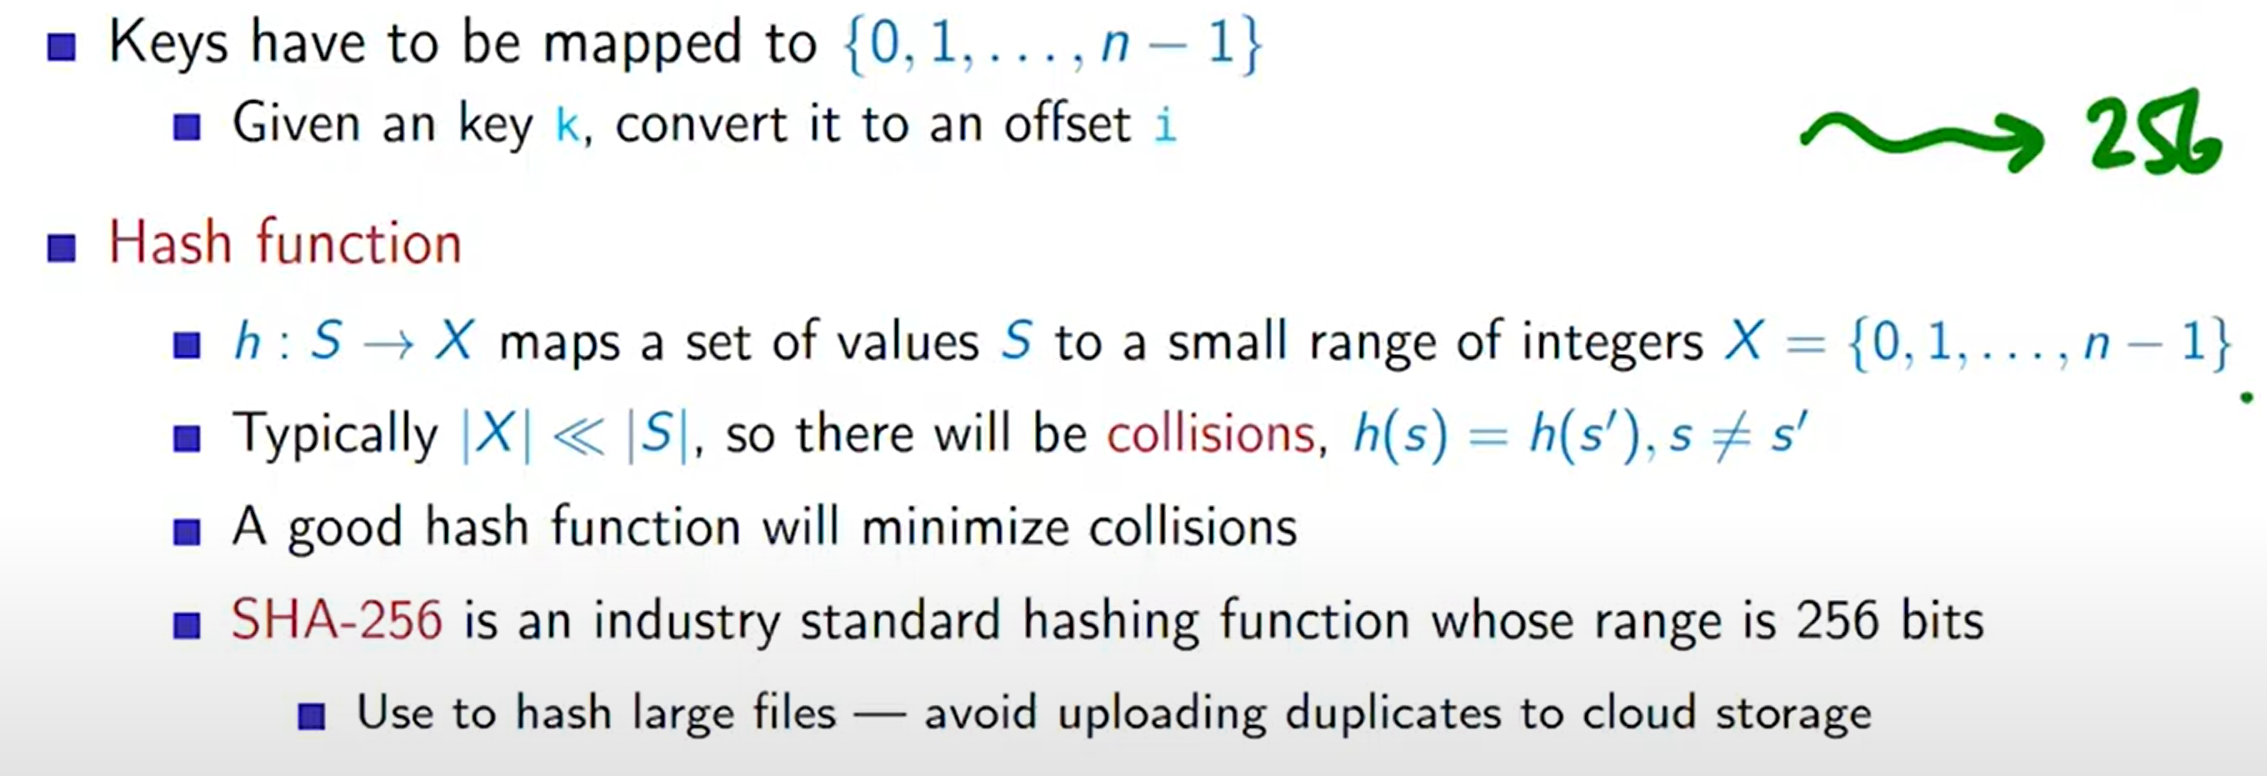

* An array A of size n combined with hash function h
* h maps keys to ints {0,n}
When we create and entry for key k, A[h(k)] will be unused
* Dealing with collisions
  * Open addressing (closed hashing)
  * Open hashing
    * each slot in the array points to a list of values
    * Insert into the list for given slot
* **Dictionary Keys in PYthon must be immutable**


# Week 4

## L4.1 - Introduction to Graphs



Example:
* Teachers and courses
  * T -> set of Teachers
  * C -> set of courses
  * **A <_ T x C** describes allocation of teachers to courses
  * A = {(t,c)|(t,c) E T x C, t teaches c)

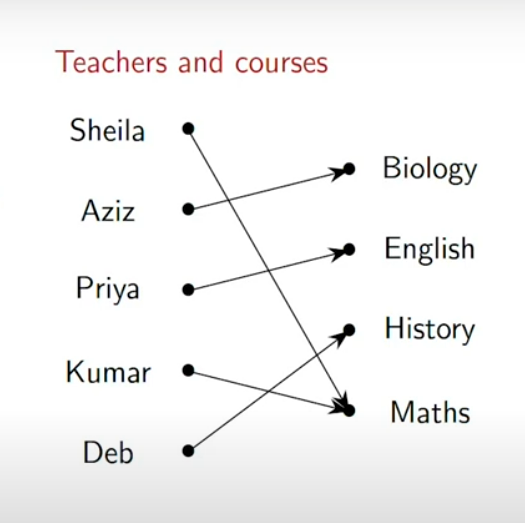

* Friendships
  * P, a set of students
  * F <= P x P describes pairs of students are friends
  * F = {(p,q)|p,q  E  P, p =/= q, q friend p)
  * symmetric relation

  Using graph, joined with an edge
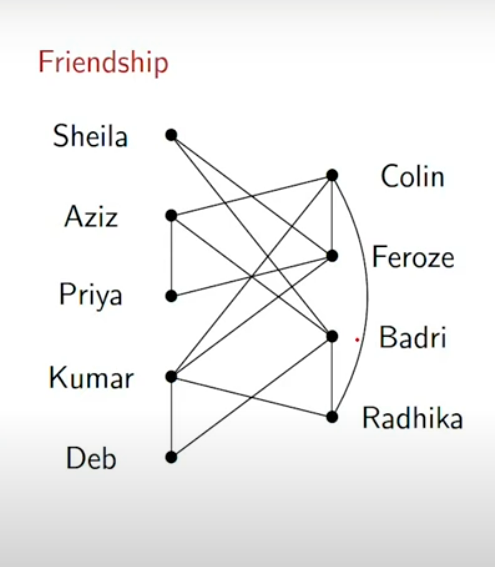


### Graph
G = (v,E)
* V -> set of vertices of nodes
* E -> set of edges
* E <= V x V - binary relation
* constraint: vertex not connected to itself (Irreflexive)

*Relflexive means relation unto itself*

#### Directed Graph
* (v, v') *E* E does not imply (v', v) *E* E
* teacher graph is directed

#### Undirected Graph
* (v, v') E if (v', v) E
* effectively the same edge
* friendship one is undirected




### Path
* A path is a sequence of vertices connected by edges

* A sequence that re-visits a vertex is usually called a walk

### Reachability
* For paths in directed graphs
* Vertex v is reachable from vertex u if there is a path from u to v

Typical questions:
* Is v reachable from u?
* What is the shortest path from u to v?
* what are the vertices reachable from u?
* Is the graph connected? Are all vertices reachable from each other?

### Map Colouring
* Abstraction:
  * Each state is a vertex
  * Connect states that share a border
* Graph G = (V, E), set of colours C
* Colouring is a function c: V -> C such that (u, v) *E* E => c(u) =/= c(v)
* Given G = (V, E), what is the smallest set of colours need to colour G
* Four colour theorem: For planar graphs derived from geographical maps, 4 colours suffice
* Not all graphs are planar, general case? Why care?

### Independent set
* Subset of vertices such that no two are connected by an edge

### Matching
* G = (V, E), an undirected graph
* A matching is a subset of M <= E of mutually disjoint edges



## L4.2 - Representing Graphs


How do we represent this picture so that we can compute reachability
* Physical graphs useful for visual representation, but not useful for an algorithm

### Adjacency Matrix
* Let |V| = n
  * Assume V = {0,1, ... , n-1}
  * Use a table to map actual vertex "names" to this set
* Edges are not pairs (i, j) where 0 <_ i,j < n
>
  * Usually assume i =/= j, no self loops

Adjacency Matrix
* A[i, j] = 1 if (i,j) *E* E

### Degree of a vertex
* Number of edges incident on i
* For directed graphs, **outdegree** and **indegree**


### Checking Reachability
* mark source vertex as reachable
* systematically mark neighbours of marked vertices
* Stop when target becomes marked
* Strategies
  * Breadth First - Propogate marks in layers
  * Depth first - explore a path till it dies out, then backtrack

## L4.3 - BFS


* Explore graph level by level
  * Firest visit vertices one step away, then two steps away, and so on
* Each visited vertex has to be explored
  * Extend teh seach to its neighbours
  * Do this only once for each vertex
* Maintain information about vertices
  * Which vertices have been visited already
  * Amond these which are yet to be explored

### BFS
* Assume V = {1,...,n-1}
* visited: V -> {true, false} tells us whether v *E* V has been visited
* maintain a sequence of visited vertices yet to be explored
  * A queue - FIFO ( first in , first out )
  * Initially empty
* Exploring a vertex i
  * For each edge (i,j) if visited(j) is False
    * Set visited(j) to True
    * Append j to the Queue

###
Initially:
* visited(v) = False for all
* Queue of vertices to be explored is empty

Start BFS from vertex j
* Set visited(j) = True
* Add j to the queue

In [ ]:
# Execution of queue
class Queue:
  def __init__(self):
    self.queue = []

  def addq(self, v):
    self.queue.append(v)

  def delq(self):
    v = None
    if not self.isempty():
      v =self.queue[0]
      self.queue = self.queue[1:]
    return(v)

  def isempty(self):
    return(len(self.queue) == 0)

In [ ]:
def BFS(AMat, v):
  (rows, cols) = AMat.shape
  visited = {}
  for i in range(rows):
    visited[i] = False
  q =  Queue()

  visited[v] = True
  q.addq(v)

  while not q.isempty():
    j = q.delq()
    for k in neighbours(AMat, j):
      if not visited[k]:
        visited[k] = True
        q.addq(k)

  return(visited)

### Complexity of BFS
G = (V,E)
* |V| = n
* |E| = m
* if G is connected m can vary from n-1 to n(n-1)/2

In BFS, each reachable vertex id processed exactly once
* Visit the vertex, add to queue
* Explore the vertex, remove from queue
* Visit and explore at most n vertices

Exploring a vertex:
* Check all outgoing edges
* Adjacency matrix:
  * To explore i, scan neighbours(i)
  * Look up n entries in row i, regardless of degree(i)
* Adjacency list:
  * List neighbours(i) is directly available
  * Time to explore i in degree(i)
  * Degree varies across vertices
* Sum of degrees
  * sum of degrees in 2m
  * Each edge (i,j) contributes to degree(i) and degree(j)

### BFS with adjacency matrix
* n steps to initiaize each vertex
* n steps to each explore each vertex
Overall time is O(n^2)

### BFS with adjacency list
* n steps to initalize each vertex
* 2m steps (sum of degrees) to explore all vertices
Overall time is O(n + m)

### Overall Summary
If m << n^2, working with adjacency lists is much more efficient

For graphs, O(m +n) is typically the best possible complexity



### Enhancing BFS to records paths

Just keep another dicitonary to see the parent,
Helps in tracing out paths

In [ ]:
# function to give dictionary of the path taken through the graph
def BFSListPath(AList, v):
  (visited, parent) = ({},{})
  for i in AList.keys():
    visited[i] = False
    parent[i] = -1

  q = Queue()
  visited[v] = True
  q.addq(v)

  while not q.isempty():
    j = q.delq()
    for k in AList[j]:
      if (not visited[k]):
        visited[k] = True
        parent[k] = j
        q.addq(k)
  return(parent)


In [ ]:
# function to see how far away each element is from the starting point (How many steps)
def BFSListPathLevel(AList, v):
  (level, parent) = ({},{})
  for i in AList.keys():
    level[i] = -1
    parent[i] = -1

  q = Queue()
  level[v] = 0
  q.addq(v)

  while not q.isempty():
    j = q.delq()
    for k in AList[j]:
      if (level[k] == -1):
        level[k] = level[j] + 1
        parent[k] = j
        q.addq(k)
  return(level, parent)


## L4.4 - DFS

* Start from i, visit an unexplored neighbour j
* Suspend the exploration of i and explore j instead
* Continue till you reach a vertex with no unexplored neighbours
* Backtrack to nearest suspended vertex that still has an unexplored neighbour
* Suspended vertices are stored in a stack
  * LIFO (last in, first out)
  * Most recently suspended is checked first

In [ ]:
# DFS most natural to implement recursively,
# For each unvisited neighbour of v, call DFS(v)

(visited, parent) = ({}, {})

def DFSInit(AMat):
  # Initialization
  (rows, cols) = AMat.shape
  for i in range(rows):
    visited[i] = False
    parent[i] = -1
  return

def DFSGlobal(AMat, v):
  visited[v] = True
  for k in neighbours(AMat, v):
    if not visited[k]:
      parent[k] = v
      DFSGlobal(AMat, k)
  return

# No need to maintain a stack
# Recursion implicitly maintains a stack

### Complexity of DFS
* Like BFS each vertex is marked and explored once
* Explore vertex v requires scanning all neighbours of v
  * O(n) time for adjacency matrix, independent of degree(v)
  * degree(v) time for adjacency list
    * Total time is O(m) across all vertices
* Overall complexity is same as BFS
  * O(n^2) using adjacency matrix
  * O(n + m) using adjacency list

## L4.5 - App of BFS and DFS


### Connectivity
* Undirected graph is connected if every vertex if reachable from every other vertex
* In a disconnected graph, we can identiy the connected components
  * Maximal subsets of vertices that are connected
  * Isolated vertices are trivial components

### Identifying connected components
* Assign each vertex a components number
* Start BFS/DFS from vertex 0
  * Initialize component number to 0
  * All visited nodes form a connected component
  * Assign each visited node components number 0
* Pick smalled unvisited node j
  * Increment component number by 1
  * Run BFS/DFS from node j
  * Assign each visited node component number 1
* Repeat until all nodes are visited


In [ ]:
def Components(AList):
  component = {}
  for i in AList.keys():
    component[i] = -1
  (compid, seen) = (0,0)

  while seen <= max(AList.keys()):
    startv = min([i for i in AList.keys() if component[i] == -1])
    visited = BFSList(AList, startv)
    for i in visited.keys():
      if visited[i]:
        seen += 1
        component[i] = compid
    compid += 1
  return(component)

### Detecting cycles
* A cycle is a path (technically, a walk) that starts and ends at the same vertex
* Cycle should not repeat edges ( i - j - i )
* **SIMPLE CYCLE** - Only repeated vertices are start and end
* A graph is acyclic if it has no cycles

### BFS Tree
* Edges explored by BFS form a tree
  * One tree per component
  * Collection of trees is a *forest*
* **Any non tree edge creates a cycle**

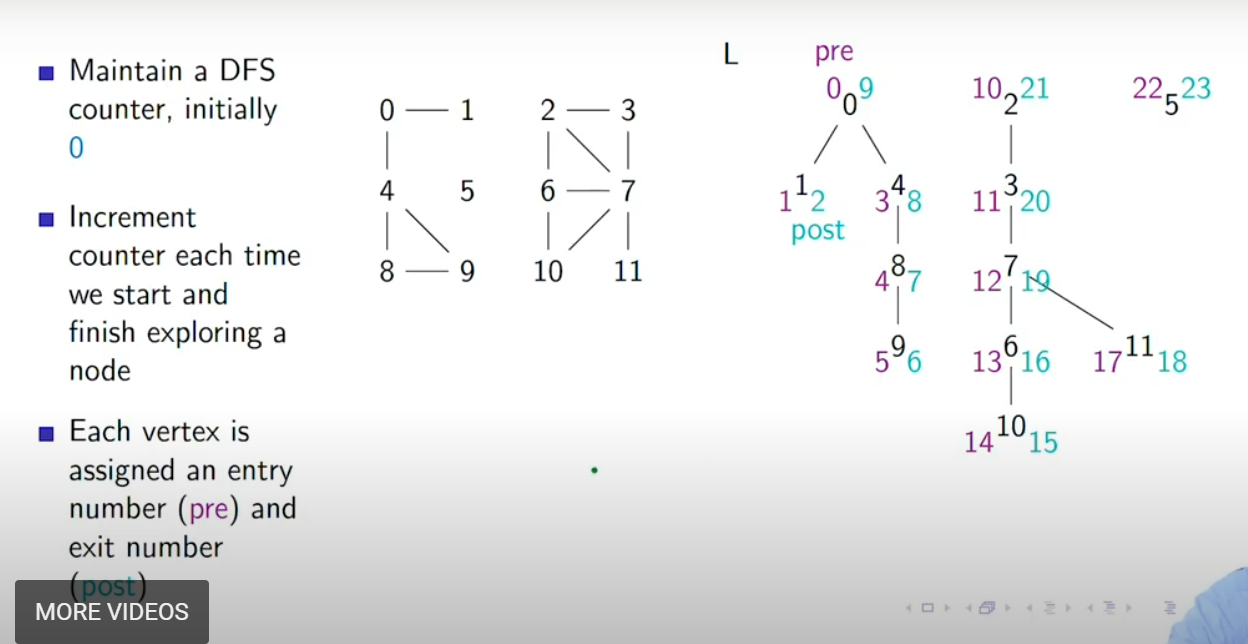

Non tree edges create cycles

* To compute pre and post pass counter via recursive DFS calls

In [ ]:
(visited, pre, post) = ({}, {}, {})

def DFSInitPrePost(AList):
  for i in AList.keys():
    visited[i] = False
    (pre[i], post[i]) = (-1,-1)
  return

def DFS(AList, v, count):
  visited[v] = True
  pre[v] = count
  count = count+1
  for k in AList[v]:
    if not visited[k]:
      parent[k] = v
      count = DFS(AList, k, count)
  post[v] = count
  count = count+1
  return count

### Directed Graphs
* Need to add content

### Summary
* BFS and DFS can be used to identify connected components in an undirected graph
* In a directed graph, non-tree edges can be forward/back/cross
  * Only back edges generate cycles
  * Classify non-tree edges using DFS numbering
* Directed graphs decompose into strongly connected components
  * DFS numbering can be used to compute scc decomposition
* DFS numbering can also be used to identiy the other features such as articulation points (cut vertices) and bridges (cut edges)